In [21]:
include("particle_methods.jl")
# -----------------------------
using LinearAlgebra
using Plots
using Random
# -----------------------------
# Useful constants
hbar = 1;

In [22]:
function Simple_avoided_crossing(x::Real)::Array{Real,2}
    A, B, C, D = 0.01, 1.6, 0.005, 1.0
    V = zeros(2,2)
    if x>0
        V[1,1] = A*(1-exp(-B*x))
    else
        V[1,1] = -A*(1-exp(B*x))
    end
    V[2,2] = -V[1,1]
    V[1,2] = C*exp(-D*x^2)
    V[2,1] = V[1,2]
    return V
end

function dV_Simple_Avoided_Crossing(x::Real)::Array{Real,2}
    A = 0.01
    B = 1.6
    C = 0.005
    D = 1.0
    dV = zeros(2,2)
    if x>0
        dV[1,1] = A*B*(exp(-B*x))
    else
        dV[1,1] = A*B*(exp(B*x))
    end
    dV[2,2] = -dV[1,1]
    dV[1,2] = dV[2,1] = 2x*C*D*exp(-D*x^2)
    return dV
end

"""
Dual Avoided Crossing Potential,
as model "B" in the original paper of Tully.
"""
function Dual_avoided_crossing(x::Real)::Array{Real,2}
    A, B, C, D = 0.1, 0.28, 0.015, 0.06
    E_0 = 0.05
    V = zeros(2,2)
    V[1,1] = 0.
    V[2,2] = -A*exp(-B*x^2)+E_0
    V[1,2] = V[2,1] = C*exp(-D*x^2)
    return V
end

function dV_Dual_avoided_crossing(x::Real)::Array{Real,2}
    A, B, C, D = 0.1, 0.28, 0.015, 0.06
    V = zeros(2,2)
    V[1,1] = 0.
    V[2,2] = A*B*2x*exp(-B*x^2)
    V[1,2] = V[2,1] = -C*D*2x*exp(-D*x^2)
    return V
end

"""
Extended coupling Potential,
as model "C" in the original paper of Tully.
"""
function Extended_coupling(x::Real)::Array{Real,2}
    A, B, C = 6e-4, 0.1, 0.9
    V = zeros(2,2)
    V[1,1] = A
    V[2,2] = -A
    if x<0
        V[1,2] = B*exp(C*x)
    else
        V[1,2] = B*(2-exp(-C*x))
    end
    V[2,1] = V[1,2]
    return V
end

function dV_Extended_coupling(x::Real)::Array{Real,2}
    A, B, C = 6e-4, 0.1, 0.9
    dV = zeros(2,2)
    dV[1,1] = 0
    dV[2,2] = 0
    if x<0
        dV[1,2] = B*C*exp(C*x)
    else
        dV[1,2] = B*C*exp(-C*x)
    end
    dV[2,1] = dV[1,2]
    return dV
end

dV_Extended_coupling (generic function with 1 method)

In [32]:
function init(k=10, pos=-5, c1=1, surface=1, m=2000)
    return pos, k, c1, surface, m
end

function kinetic_energy(vel::Real, m::Real)::Float64
    return vel*vel*m/2
end

function total_energy(pos::Real, vel::Real, surface::Int,m=2000)::Float64
    return potential_energy(pos,surface)+kinetic_energy(vel,m)
end

function potential_energy(pos::Real, surface::Int)::Float64
    return eigvals(Potential(pos))[surface]
end

function der_surface(pos, Potential, surface=1)
    # This function is evaluating the gradient of the 
    # potential energy surface.
    dx = 0.001
    dim = length(pos)
    der = zeros(dim)
    for count in 1:dim
        ev1 = eigvals(Potential(pos[count]-dx))[surface]
        ev2 = eigvals(Potential(pos[count]+dx))[surface]
        der[count] = (ev2-ev1)/2/dx
    end
    return der
end

function nac(pos::Real, Potential, i::Int64, j::Int64)
    # function for the evaluation of the non adiabatic coupling vector d_ij
    # non-adiabatic vector cupling = Connection (= vector potential)
    # i and j can take ony values 1 and 2
    dim = length(pos);
    dx = 0.001;
    nac = zeros(dim);
    for count in 1:dim
        e_vec1 = eigvecs(Potential(pos[count]))[:,j];
        e_vec2_1 = eigvecs(Potential(pos[count]-dx))[:,i];
        e_vec2_2 = eigvecs(Potential(pos[count]+dx))[:,i];
        der = (e_vec2_2-e_vec2_1)/2/dx;
        nac[count] = sum(conj(e_vec1).*der)
    end
    return nac
end

nac (generic function with 3 methods)

In [36]:
x = range(-5,stop=5,length=1000)
y = zeros(length(x))
ev = zeros(length(x),2)
Potential = Simple_avoided_crossing()
Potential = Dual_avoided_crossing()

for i in 1:length(x)
    y[i] = nac(x[i],Potential,1,2)[1]
    ev[i,:]=eigvals(Potential(x[i]))[:]
end

MethodError: MethodError: no method matching Simple_avoided_crossing()
Closest candidates are:
  Simple_avoided_crossing(!Matched::Real) at In[22]:2

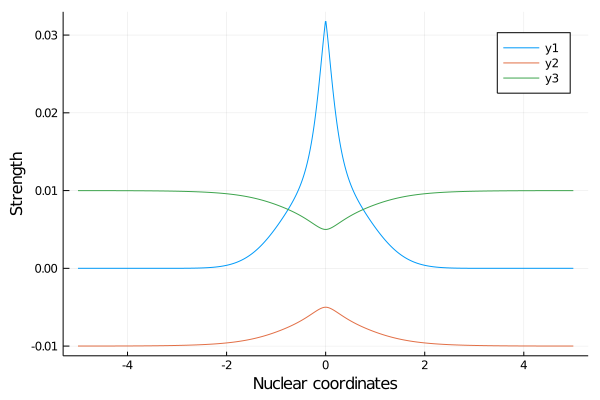

In [31]:
plot(x, y/50)
plot!(x, ev)
plot!(xlabel = "Nuclear coordinates", ylabel = "Strength")

In [13]:
x = range(-5,stop=5,length=100)

-5.0:0.10101010101010101:5.0